In [1]:
import pandas

In [2]:
df = pandas.read_csv("creditCardDefaultReduced.csv")

In [74]:
df.shape

(30000, 9)

In [75]:
df.dtypes

Limit_Bal     int64
Education    object
Marriage     object
Age           int64
Pay_0        object
Bill_Amt1     int64
Pay_Amt1      int64
Payment      object
Card         object
dtype: object

In [76]:
df.head()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold


In [77]:
df.tail()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
29995,220000,High school,married,39,Delay0,188948,8500,Paid,Gold
29996,150000,High school,single,43,ontime,1683,1837,Paid,Gold
29997,30000,University,single,37,Delay4,3565,0,Missed,Gold
29998,80000,High school,married,41,Delay1,-1645,85900,Missed,Gold
29999,50000,University,married,46,Delay0,47929,2078,Missed,Gold


In [78]:
df.isna().sum()

Limit_Bal    0
Education    0
Marriage     0
Age          0
Pay_0        0
Bill_Amt1    0
Pay_Amt1     0
Payment      0
Card         0
dtype: int64

In [79]:
df.describe()

,Limit_Bal,Age,Bill_Amt1,Pay_Amt1
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,5663.580500
std,129747.661567,9.217904,73635.860576,16563.280354
min,10000.000000,21.000000,-165580.000000,0.000000
25%,50000.000000,28.000000,3558.750000,1000.000000
50%,140000.000000,34.000000,22381.500000,2100.000000
75%,240000.000000,41.000000,67091.000000,5006.000000
max,1000000.000000,79.000000,964511.000000,873552.000000


In [3]:
import sklearn

In [4]:
import sklearn.model_selection

In [5]:
import sklearn.metrics

In [6]:
import numpy

In [7]:
numpy.random.seed(28)

In [8]:
outcome = df['Payment']

In [86]:
outcome

0        Missed
1        Missed
2          Paid
3          Paid
4          Paid
          ...  
29995      Paid
29996      Paid
29997    Missed
29998    Missed
29999    Missed
Name: Payment, Length: 30000, dtype: object

In [9]:
numericFeatures = df [ ['Limit_Bal', 'Bill_Amt1', 'Pay_Amt1', 'Age']  ]
numericFeatures

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age
0,20000,3913,0,24
1,120000,2682,0,26
2,90000,29239,1518,34
3,50000,46990,2000,37
4,50000,8617,2000,57
...,...,...,...,...
29995,220000,188948,8500,39
29996,150000,1683,1837,43
29997,30000,3565,0,37
29998,80000,-1645,85900,41


In [89]:
df.head()

,Limit_Bal,Education,Marriage,Age,Pay_0,Bill_Amt1,Pay_Amt1,Payment,Card
0,20000,University,married,24,Delay2,3913,0,Missed,Normal
1,120000,University,single,26,ontime,2682,0,Missed,Normal
2,90000,University,single,34,Delay0,29239,1518,Paid,Normal
3,50000,University,married,37,Delay0,46990,2000,Paid,Normal
4,50000,University,married,57,ontime,8617,2000,Paid,Gold


In [10]:
df['Marriage'].value_counts()

single     15964
married    13659
other        323
unknown       54
Name: Marriage, dtype: int64

In [11]:
dummiesMarriage = pandas.get_dummies(df['Marriage'], prefix="Marriage", drop_first=True)

In [91]:
df['Marriage']

0        married
1         single
2         single
3        married
4        married
          ...   
29995    married
29996     single
29997     single
29998    married
29999    married
Name: Marriage, Length: 30000, dtype: object

In [92]:
dummiesMarriage

,Marriage_other,Marriage_single,Marriage_unknown
0,0,0,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
29995,0,0,0
29996,0,1,0
29997,0,1,0
29998,0,0,0


In [12]:
dummiesCard = pandas.get_dummies(df['Card'], prefix="Card", drop_first=True)

In [94]:
df['Card'].value_counts()

Normal    18112
Gold      11888
Name: Card, dtype: int64

In [95]:
dummiesCard

,Card_Normal
0,1
1,1
2,1
3,1
4,0
...,...
29995,0
29996,0
29997,0
29998,0


In [96]:
df['Card']

0        Normal
1        Normal
2        Normal
3        Normal
4          Gold
          ...  
29995      Gold
29996      Gold
29997      Gold
29998      Gold
29999      Gold
Name: Card, Length: 30000, dtype: object

In [13]:
dummiesPay_0 = pandas.get_dummies(df['Pay_0'], prefix="Pay_0", drop_first=True)

In [98]:
df['Pay_0'].value_counts()

Delay0     14737
ontime      5686
Delay1      3688
unknown     2759
Delay2      2667
Delay3       322
Delay4        76
Delay5        26
Delay8+       19
Delay6        11
Delay7         9
Name: Pay_0, dtype: int64

In [99]:
dummiesPay_0.shape

(30000, 10)

In [14]:
features = pandas.concat([numericFeatures, dummiesMarriage, dummiesCard, dummiesPay_0], axis = 1)

In [101]:
features

,Limit_Bal,Bill_Amt1,Pay_Amt1,Age,Marriage_other,Marriage_single,Marriage_unknown,Card_Normal,Pay_0_Delay1,Pay_0_Delay2,Pay_0_Delay3,Pay_0_Delay4,Pay_0_Delay5,Pay_0_Delay6,Pay_0_Delay7,Pay_0_Delay8+,Pay_0_ontime,Pay_0_unknown
0,20000,3913,0,24,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,120000,2682,0,26,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,90000,29239,1518,34,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,50000,46990,2000,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,50000,8617,2000,57,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,188948,8500,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000,1683,1837,43,0,1,0,0,0,0,0,0,0,0,0,0,1,0
29997,30000,3565,0,37,0,1,0,0,0,0,0,1,0,0,0,0,0,0
29998,80000,-1645,85900,41,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [15]:
featuresTrain, featuresTest, outcomeTrain, outcomeTest = sklearn.model_selection.train_test_split(
    features, outcome, test_size = 0.33)

In [103]:
featuresTrain.shape

(20100, 18)

In [104]:
featuresTest.shape

(9900, 18)

In [105]:
outcomeTrain.shape

(20100,)

In [106]:
outcomeTest.shape

(9900,)

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
modelLog = LogisticRegression()

In [109]:
resultLog = modelLog.fit(featuresTrain, outcomeTrain)

In [110]:
predLogTrain = modelLog.predict(featuresTrain)

In [111]:
resultLog

LogisticRegression()

In [112]:
predLogTrain

array(['Paid', 'Paid', 'Paid', ..., 'Paid', 'Paid', 'Paid'], dtype=object)

In [113]:
cmLogTrain = sklearn.metrics.confusion_matrix(outcomeTrain, predLogTrain)

In [122]:
print(cmLogTrain)

[[    0  4491]
 [    0 15609]]


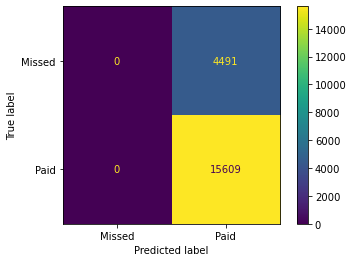

In [123]:
sklearn.metrics.ConfusionMatrixDisplay(cmLogTrain, display_labels = modelLog.classes_).plot()

In [116]:
(15609+0)/20100

0.7765671641791044

In [117]:
sklearn.metrics.accuracy_score(outcomeTrain, predLogTrain)

0.7765671641791044

In [118]:
predLogTest = modelLog.predict(featuresTest)

In [119]:
cmLogTest = sklearn.metrics.confusion_matrix(outcomeTest, predLogTest)

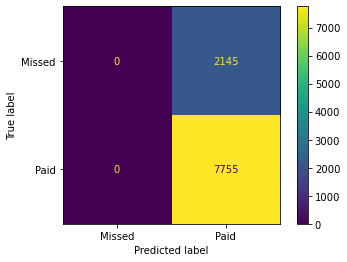

In [120]:
sklearn.metrics.ConfusionMatrixDisplay(cmLogTest, display_labels = modelLog.classes_).plot()

In [121]:
sklearn.metrics.accuracy_score(outcomeTest, predLogTest)

0.7833333333333333

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
modelNB = GaussianNB()

In [18]:
resultNB = modelNB.fit(featuresTrain, outcomeTrain)

In [19]:
predictNB = resultNB.predict(featuresTrain)

In [22]:
cmNBTrain = sklearn.metrics.confusion_matrix(outcomeTrain, predictNB)

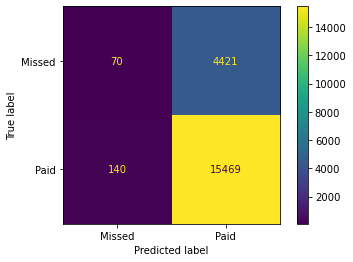

In [23]:
sklearn.metrics.ConfusionMatrixDisplay(cmNBTrain, display_labels = modelNB.classes_).plot()

In [24]:
sklearn.metrics.accuracy_score(outcomeTrain, predictNB)

0.7730845771144279

In [25]:
predNBTest = modelNB.predict(featuresTest)

In [26]:
sklearn.metrics.accuracy_score(outcomeTest, predNBTest)

0.778080808080808